# 0. IGNORE: Libraries setup



In [1]:
# Remove existing files
import os

!pip install -U kaleido

# Optional: directories
SETUP_DIRS = True
if (SETUP_DIRS):
  os.chdir("/content/")
  #!find './' -maxdepth 1 -type f -delete

  # Mount the drive:
  from google.colab import drive
  drive.mount('/content/drive')

# Optional: libraries
SETUP_LIBS = True
if (SETUP_LIBS):
    # Download the lineart library
    !wget -nc https://raw.githubusercontent.com/pattichis/GraphSpeeds/main/lineart_v3.py

    # Download the symbolic graphs library.
    !wget -nc 'https://raw.githubusercontent.com/pattichis/GraphFuns/main/symbolic_graphs2.py'


# Import functions for creating videos
from lineart_v3 import table, simulationVideo, textImage, plotTablesLines, CreateVideo, changeVideoSpeed

# Import symbolic plotting functions
from symbolic_graphs2 import graph_funs
import numpy as np

# Import the library:
import sympy as sp

from sympy.interactive.printing import init_printing
init_printing()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
Mounted at /content/drive
--2025-02-27 19:42:55--  https://raw.githubusercontent.com/pattichis/GraphSpeeds/main/lineart_v3.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30381 (30K) [text/plain]
Saving to: ‘lineart_v3.py’

lineart_v3.py       100%[===================>]  29.67K  --.-KB/s    in 0.01s   

2025-02-27 19:42:55 (2.52 MB/s) - ‘lineart_v3.py’ saved [30381/30381]

--2025-02-27 19:42:55--  https://raw.githubusercontent.com/pattichis/GraphFuns/main/symbolic_graphs2.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:

  if event.key is 'enter':



In [2]:
# Animation class
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

from IPython.core.debugger import set_trace

class Animate:
    def __init__(self, scatter_plot=False, keep_all=True):
        """
        Creates animations of functions.

        scatter_plot: if True, then it plots a scatter plot instead of a line plot.

        keep_all: if True, it keeps all the points from 0 to num_of_points.
                  Otherwise, each frame plots num_of_points/num_of_frames points.
        """

        # Keep all points:
        self.keep_all = keep_all

        # Specify scatter plot:
        self.scatter_plot = scatter_plot

    def set_int_x(self, minX, maxX):
      """
      sets an integer range for the x-axis.

        minX: The minimum value for the x-axis.
        maxX: The maximum value for the x-axis.
      """
      if (not isinstance(minX, int)) or (not isinstance(maxX, int)):
        raise ValueError("minX and maxX must be integers.")
      if not minX < maxX:
        raise ValueError("MinX must be less than MaxX.")

      # Set the limits:
      self.minX = minX
      self.maxX = maxX

      # Create a custom range:
      self.X_list = np.array(range(minX, maxX+1))
      self.num_of_frames = len(self.X_list)-1

      # Create the frame index:
      num_of_points = len(self.X_list)
      self.points = np.array(range(0, num_of_points))

      print(self.X_list)
      print(self.points)


    def set_x_range(self, minX, maxX, num_of_points, num_of_frames):
      """
      sets the range for the x-axis.

        minX: The minimum value for the x-axis.
        maxX: The maximum value for the x-axis.
        num_of_points: Number of points for the x-axis.
        num_of_frames: Number of frames for the animation.
      """

      if not minX < maxX:
        raise ValueError("MinX must be less than MaxX.")
      if not minY < maxY:
        raise ValueError("MinY must be less than MaxY.")
      if not num_of_points > 0:
        raise ValueError("num_of_points must be greater than 0.")

      if num_of_frames > num_of_points:
        print(f"num_of_frames={num_of_frames} num_of_points={num_of_points}")
        raise ValueError("num_of_frames must be less than or equal to num_of_points.")

      # Set the limits:
      self.num_of_frames = num_of_frames

      # Limits:
      self.minX = minX
      self.maxX = maxX

      # Create a custom range:
      self.X_list = np.linspace(minX, maxX, num=num_of_points)

      # Create the frame index:
      self.points = (np.floor(np.linspace(0, num_of_points-1, self.num_of_frames+1))).astype(int)



    def set_labels(self, x_label="X-axis", y_label="Y-axis"):
      """
      x_label: The label for the x-axis.
      y_label: The label for the y-axis.
      num_of_points: The number of points to plot on each frame.
      """
      # X and Y labels:
      self.x_label = x_label
      self.y_label = y_label


    def add_exp_functions(self, a_list, b_list, c_list, d_list):
      """
      Adds a list of exponential functions to the animation defined using the lists for:
      a_list: a values.
      b_list: b values.
      c_list: c values.
      d_list: d values.
      """
      if (
          len(a_list) != len(b_list) or
          len(a_list) != len(c_list) or
          len(a_list) != len(d_list)
          ):
        raise ValueError("All lists must be of the same length!")

      if not a_list:
        raise ValueError("a_list must not be empty!")

      # Create a list of functions and names:
      self.functions = []
      self.names = []
      self.var_name = "x"

      x = sp.symbols('x')
      for a, b, c, d in zip(a_list, b_list, c_list, d_list):
        equation_string = f"{a} * {b}**(x-{c}) + {d}"
        eqn = sp.parse_expr(equation_string)

        self.functions.append(eqn)
        self.names.append(f"y = {a} * {b}^(x-{c}) + {d}")

    def add_funs(self, funs, var_name, names):
      """
      Adds a list functions to the animation plot.
      funs: contains the list of functions.
      common_var: the common variable.
      names: the names of the functions.
      """
      if (
          len(funs) != len(names)
          ):
        raise ValueError("The number of functions and their list of names must be of the same length!")

      if not var_name:
        raise ValueError("You need to provide a common variable for the functions.")

      # Create a list of functions and names:
      self.var_name = var_name
      self.functions = funs
      self.names = names


    def setup_plot(self):
      """ Sets up a plot based on the list values.
      """
      # Create a figure and axis
      self.fig, self.ax = plt.subplots(figsize=(8, 6))
      self.line_list = []

      # Go through the loop:
      for name in self.names:
        line, = self.ax.plot([], [], label=name)
        self.line_list.append(line)


    def init(self):
      """ initialization function for animation.
      """
      if (self.line_list is None):
        raise ValueError("Call setup_plot first. line_list must be set before calling init.")

      self.ax.set_xlim(self.minX, self.maxX)
      self.ax.set_ylim(0, 1)
      return self.line_list

    def update(self, frame):
      """ Update function for animation.
      """
      if (self.line_list is None):
        raise ValueError("Call setup_plot first. line_list must be set before calling update.")

      # set_trace() # Use for debugging your code.

      # Setup the x range
      if (self.keep_all):
        x_min = self.X_list[0]
        min_index = 0
      else:
        x_min = self.X_list[self.points[frame]]
        min_index = frame

      x_max = self.X_list[self.points[frame+1]]
      x_vals = self.X_list[min_index:self.points[frame+1]+1]

      # print(f"frame={frame}, min_index={min_index}, x_min={x_min}, x_max={x_max}")
      # print(f"x_vals={x_vals}")

      # Setup the functions:
      # Define the symbolic variable
      x = sp.symbols(self.var_name)
      y_min_dynamic = float('inf')
      y_max_dynamic = float('-inf')
      for func, line in zip(self.functions, self.line_list):
        # Convert symbolic function to a numerical function
        numerical_func = sp.lambdify(x, func, 'numpy')
        # Compute y-values
        y = [numerical_func(val) for val in x_vals]
        if self.scatter_plot:
          plt.scatter(x_vals, y)
        else:
          line.set_data(x_vals, y)

        # Update
        y_min_dynamic = min(y_min_dynamic, min(y))
        y_max_dynamic = max(y_max_dynamic, max(y))

      # Update x and y ranges
      x_min_dynamic = x_min # Modify here to maintain the left margin
      x_max_dynamic = x_max

      # Add a margin of 10% for both axes
      x_margin = (x_max_dynamic - x_min_dynamic) * 0.1
      y_margin = (y_max_dynamic - y_min_dynamic) * 0.1

      self.ax.set_xlim(x_min_dynamic - x_margin, x_max_dynamic + x_margin)
      self.ax.set_ylim(y_min_dynamic - y_margin, y_max_dynamic + y_margin)

      # Update title dynamically
      self.ax.set_title(f"Frame {frame}")

      return self.line_list

    def create_animation(self, x_label="x axis", y_label="y axis", interval=500):
      """ Creates the animation given:
      x_label: The label for the x-axis.
      y_label: The label for the y-axis.
      interval: The interval between frames in milliseconds.
      """
      self.ani = FuncAnimation(self.fig, self.update, frames=self.num_of_frames, init_func=self.init, interval=interval, blit=False)

      # Add labels, legend, and grid
      self.ax.set_xlabel(x_label)
      self.ax.set_ylabel(y_label)
      self.ax.legend()
      self.ax.grid(True)

      # Show the animation
      self.fig.show()

      return(self.ani)



In [3]:
# Plot multiple functions here.
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def plot_funs(functions,
              t_values,
              names,
              var_name="t",
              title="Comparison of multiple functions",
              x_label="t",
              y_label="y"):
    """
    Plots multiple sequences based on given equations.

    Parameters:
    - functions: List of symbolic equations to plot.
    - t_values: List or array of integer t-values shared across all functions.
    - names: List of names corresponding to each function.
    - title: Title of the plot (default: "Symbolic Sequences Plot").
    - x_label: Label for the x-axis (default: "t").
    - y_label: Label for the y-axis (default: "y").
    """

    # set_trace() # Use for debugging your code.

    if len(functions) != len(names):
      raise ValueError("The number of functions and names must be the same!")

    if not functions:
        raise ValueError("functions must not be empty!")

    # Define the symbolic variable
    x = sp.symbols(var_name)

    # Ensure the lengths of functions and names match
    if len(functions) != len(names):
        raise ValueError("The number of functions and names must be the same.")

    # Initialize the plot
    plt.figure(figsize=(8, 6))

    # Colors and markers for variety
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    markers = ['o', 's', '^', 'D', '*']

    # Loop through each function and plot it
    for i, (func, name) in enumerate(zip(functions, names)):
        # Convert symbolic function to a numerical function
        numerical_func = sp.lambdify(x, func, 'numpy')
        # Compute y-values
        y_values = [numerical_func(val) for val in t_values]
        # Plot with distinct color and marker
        plt.plot(t_values, y_values, label=f"{name}: {func}",
                 color=colors[i % len(colors)], marker=markers[i % len(markers)], linestyle='-')

    # Add labels, legend, and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.axhline(0, color='black', linewidth=0.8, linestyle="--")  # x-axis
    plt.axvline(0, color='black', linewidth=0.8, linestyle="--")  # y-axis
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
    plt.legend(fontsize=12)

    # Show the plot
    plt.show()


In [4]:
# Arithmetic and geometric sequences

# Library of functions for different sequences
import matplotlib.pyplot as plt
import numpy as np

def equal_seqs(seq1:list[float], seq2:list[float]) -> bool:
  """ returns true if two squences are the same.

  seq1: first sequence
  seq2: second sequence
  """
  if len(seq1) != len(seq2):
    my_len = min(len(seq1), len(seq2))
    print("Sequences are of different lengths:")
    print(f"Length of sequence 1: {len(seq1)}")
    print(f"Length of sequence 2: {len(seq2)}")
    print(f"Only comparing {my_len} numbers.")

  return (seq1[0:my_len] == seq2[0:my_len])


def arithm_gen(first_num:float, d:float, n_range:int) -> list[int]:
  """ returns a list of the first n_range terms of the arithmetic sequence.
        an = a1 + (n-1)d.

  first_num: the first number in the sequence
  d: the common difference
  n_range: the number of terms in the sequence
  """
  a = first_num
  a_list = []
  for n in range(n_range):
    a_list.append(a)
    a = a + d
  return a_list


def check_arithm(a_values:list[float]) -> bool:
  """ returns True if the sequence is an arithmetic sequence, False otherwise.

  a_values: list of values for the sequence.
  """
  # Must have at-least two values:
  if len(a_values) < 3:
    return False

  # Form the difference list:
  d = a_values[1] - a_values[0]
  d_values = np.array(a_values[2:]) - np.array(a_values[1:len(a_values)-1])
  return all(d_values == d)




def geom_gen(first_num:float, r:float, n_range:int) -> list[int]:
  """ returns a list of the first n_range terms of the geometric sequence.
              an = r^n * a1

  first_num: the first number in the sequence
  r: the common ratio
  n_range: the number of terms in the sequence
  """
  a = first_num
  a_list = []
  for n in range(n_range):
    a_list.append(a)
    a = r*a
  return a_list


def check_geom(a_values:list[float]) -> bool:
  """ returns True if the sequence is a geometic sequence, False otherwise.

  a_values: list of values for the sequence.
  """
  # Must have at-least two values:
  if len(a_values) < 3:
    return False

  # Form the difference list:
  r = a_values[1] / a_values[0]
  d_values = np.array(a_values[2:]) / np.array(a_values[1:len(a_values)-1])
  return all(d_values == r)


def conv_list_gen(first_num:float, d:float, r:float, n_range:int) -> list[int]:
  """
      returns a list of the first n_range terms of the mixed sequence:
              a1  = first_num
              a2  = a1 + d
              a3  = a1 + (a2 - a1) / r
              a4  = a1 + (a3 - a2) / r
              :
              an  = a1 + (a_(n-1) - a_(n-2)) / r

  first_num: the first number in the sequence
  d: the common difference
  r: the common ratio
  """
  a_prev_prev = first_num  # a_(n-2)
  a_prev = first_num + d   # a_(n-1)
  a_list = [a_prev_prev, a_prev]

  for n in range(n_range-2):
    a = a1 + (a_prev - a_prev_prev) / r
    a_list.append(a)

    # Update:
    a_prev_prev = a_prev
    a_prev = a
  return a_list


def plot_seq(a_values:list[float], title="Sequence Plot", x_label=r"n", y_label=r"$a_n$"):
    """
    Plots a sequence stored in a_values.

    Parameters:
    a_values (list): A list of values representing the sequence.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    """
    if not a_values:
        print("The list of a-values is empty. Nothing to plot.")
        return

    # Generate x-coordinates as integers from 1 to len(y_values)
    x = list(range(1, len(a_values) + 1))

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, a_values, color='blue', marker='o', label=r'$a_n$')
    # plt.plot(x, a_values, color='blue', linestyle='-', alpha=0.7)  # Connect points with a line

    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.axhline(0, color='black', linewidth=0.8, linestyle="--")  # Horizontal line at y=0
    plt.axvline(0, color='black', linewidth=0.8, linestyle="--")  # Vertical line at x=0
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
    plt.legend()

    # Show the plot
    plt.show()





# 1. Plot any function


In [5]:
# MODIFY for plotting a function.

# Define x as a symbolic variable:
x = sp.symbols('x')

# Define exponential function
f1 = 2*(3.0)**(x) # Use parentheses and ** for exponentiation.

# Create a graph object
plot = graph_funs()


# Determine the domain for X.
# Determine the range for Y based on minimum and maximum values.
minX = -5    # Minimum value for X.
maxX = +7    # Maximum value for X.

minY = -40   # Minimum value for Y.
maxY = +40   # Maximum value for Y.

# Setup the domain:
# For integers, use num_of_points=maxX - minX + 1
num_of_points = maxX - minX + 1 # Number of points to plot.
domain1 = [minX, maxX, num_of_points]

# Setup the grid for plotting:
plot.set_XY(minX=minX, maxX=maxX, minY=minY, maxY=maxY)

# Plot function
plot_name = "Function plot"
plot.add_fun(f1, domain1, 'f1(x)='+str(f1), 'red')   # plot
plot.plot_funs(plot_title=plot_name, img_name="frame1.png")

# 2. Animate exponential plots:
$$ f(x) = a\cdot b^{(x-c)}+d$$

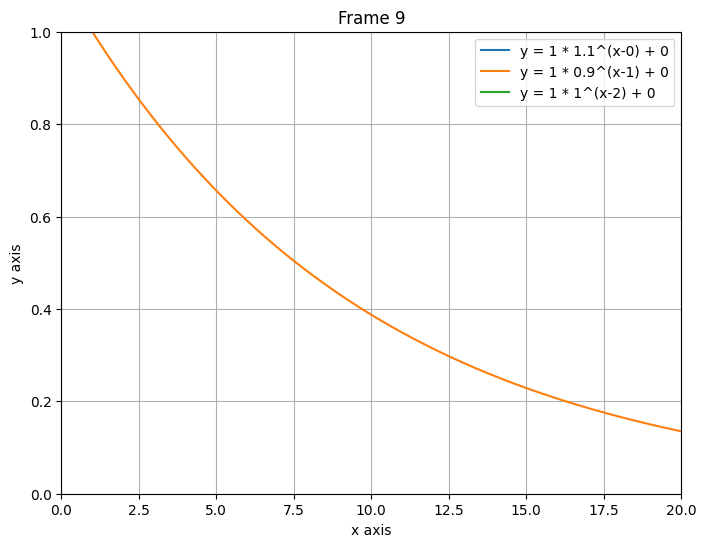

In [6]:
# Setup the lists of values: make sure your lists are of equal length.
a_list = [1,     1,   1]
b_list = [1.1,   0.9, 1]
c_list = [0,     1,   2]
d_list = [0,     0,   0]

# Setup the domain:
minX = 0   # minimum value for X.
maxX = 20  # maximum value for X.
num_of_points = 500 # Number of points used in the plot

# Animation parameters:
interval    = 500   # number of milliseconds between frames: 500 = 0.5 seconds.
num_of_frames = 10  # number of video frames used in the video animation.


# Create the animation
# Use keep_all=False to zoom in into different intervals.
# Use keep_all=True  to keep plotting the points cumulatively.
animation = Animate(keep_all=True)  # True or False

# Set it up as a sampled range:
animation.set_x_range(minX=minX, maxX=maxX, num_of_points=num_of_points, num_of_frames=num_of_frames)

animation.set_labels(x_label="X axis", y_label="Y axis")
animation.add_exp_functions(a_list=a_list, b_list=b_list, c_list=c_list, d_list=d_list)
animation.setup_plot()

# Create the animation
ani=animation.create_animation(interval=interval)

# Convert animation to HTML (for Jupyter Notebook)
from IPython.display import HTML
HTML(ani.to_jshtml())

# DEBUG the values. Should never go through 3.

# 3. Compare multiple functions on the same plot
The example here shows how to compare multiple rate functions from section 9.4.


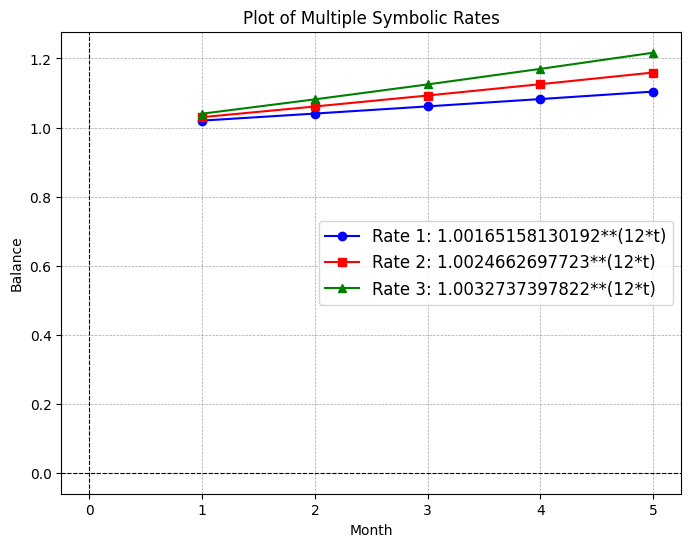

In [7]:
# Define t as a symbol:
t = sp.symbols('t')

# Define the functions to plot:
functions = [
    (1.02 ** (1/12))**(12*t), # first function
    (1.03 ** (1/12))**(12*t), # second function
    (1.04 ** (1/12))**(12*t), # third function
]

# Name the functions
names = [
    "Rate 1", # first function name
    "Rate 2", # second function name
    "Rate 3"  # third function name
]

# Define the times to plot:
t_values = np.arange(1, 6)  # t = [1, 2, 3, 4, 5]

# Plot them
plot_funs(functions=functions,
          t_values=t_values,
          names=names,
          var_name="t",
          title="Plot of Multiple Symbolic Rates",
          x_label="Month", y_label="Balance")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


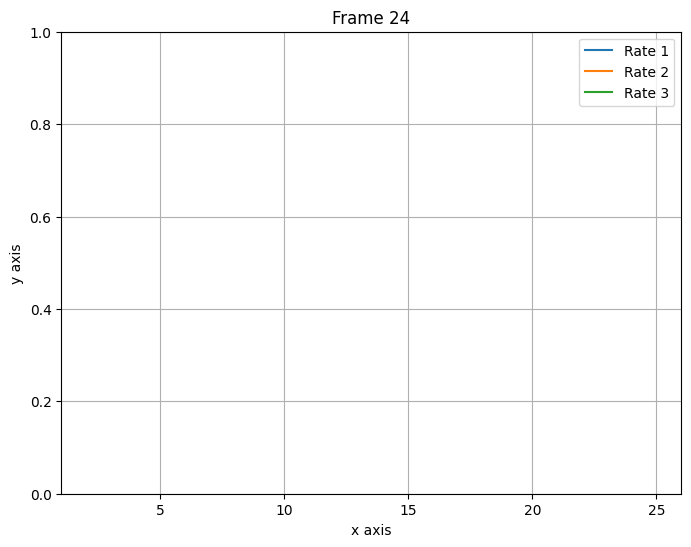

In [8]:
# Define t as a symbol:
t = sp.symbols('t')

# Define the functions to plot:
functions = [
    (1.02 ** (1/12))**(12*t), # first function
    (1.03 ** (1/12))**(12*t), # second function
    (1.04 ** (1/12))**(12*t), # third function
]

# Name the functions
names = [
    "Rate 1", # first function name
    "Rate 2", # second function name
    "Rate 3"  # third function name
]

# Define the times to plot:
t_values = np.arange(1, 25)  # t = [1, 2, 3, 4, 5]

# Setup the domain:
minX = 1  # minimum value for t.
maxX = 26  # maximum value for t.

# Animation parameters:
interval    = 500   # number of milliseconds between frames: 500 = 0.5 seconds.
num_of_frames = 3  # number of video frames used in the video animation.


# Create the animation
# Use keep_all=False to zoom in into different intervals.
# USe keep_all=True  to keep plotting the points cumulatively.
animation = Animate(scatter_plot=True,
                    keep_all=False)  # True or False

# Set it up as a sampled range: ??? ADD AN EXAMPLE FOR NON-INTEGERS.
animation.set_int_x(minX=minX, maxX=maxX)

animation.set_labels(x_label="t", y_label="Amount")
animation.add_funs(funs=functions, var_name="t", names=names)
animation.setup_plot()

# Create the animation
ani=animation.create_animation(interval=interval)

# Convert animation to HTML (for Jupyter Notebook)
from IPython.display import HTML
HTML(ani.to_jshtml())

# DEBUG the values. Should never go through 3.

# X.1. Generate an arithmetic sequence

[2, 5, 8, 11]


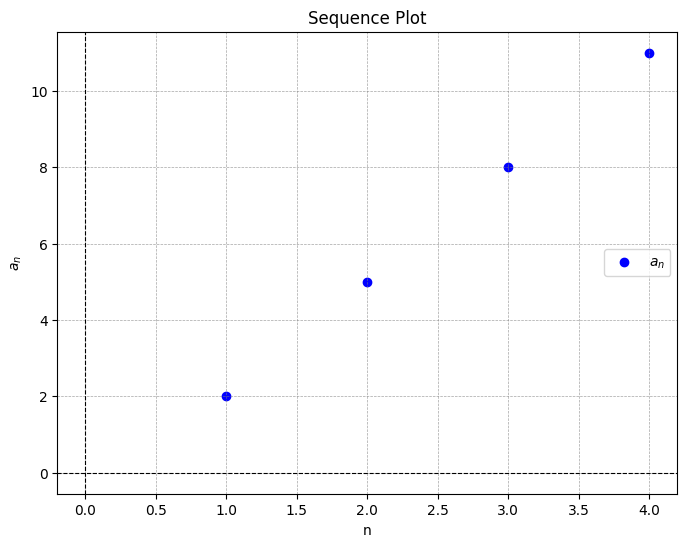

In [9]:
first_num = 2 # First number
d = 3        # d for arithmetic sequences
n_range = 4  # Number of terms to generate

# Generate the sequence
a_values = arithm_gen(first_num=first_num, d=d, n_range=n_range)

# Print them
print(a_values)

# Plot them
plot_seq(a_values)

# X.2. Verify that a series is arithmetic

In [10]:
a_values = [1, 1+3, 1+3]
check = check_arithm(a_values)

print(f"Check for arithmetic progression gives {check}")

Check for arithmetic progression gives False


# X.3. Generate a geometric sequence

[2, 6, 18, 54]


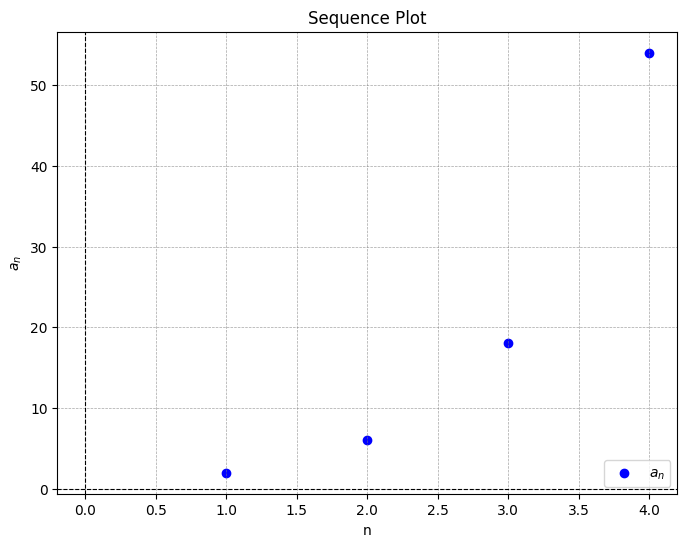

In [11]:
first_num = 2 # First number
r = 3        # r for an arithmetic sequences
n_range = 4  # Number of terms to generate

# Generate the sequence
a_values = geom_gen(first_num=first_num, r=r, n_range=n_range)

# Print them
print(a_values)

# Plot them
plot_seq(a_values)

# X.4. Verify that a series is geometric

In [12]:
a_values = [1, 1*3, 1*9]
check = check_geom(a_values)

print(f"Check for geometric progression gives {check}")

Check for geometric progression gives True


# X.5. Recursive Formula for an Arithmetic Sequence with plot
Arithmetic Sequence
$$ a_n = a_{n-1} + d, \quad \text{where $d$ is the common difference} $$

Example:
\begin{align}
  a_1 &= 7 \\
  a_n &= a_{n-1} - 9
\end{align}


a1 = 7-9
a2 = -2-9
a3 = -11-9
a4 = -20-9
a5 = -29-9
a6 = -38-9
a7 = -47-9
a8 = -56-9
a9 = -65-9
a10 = -74-9


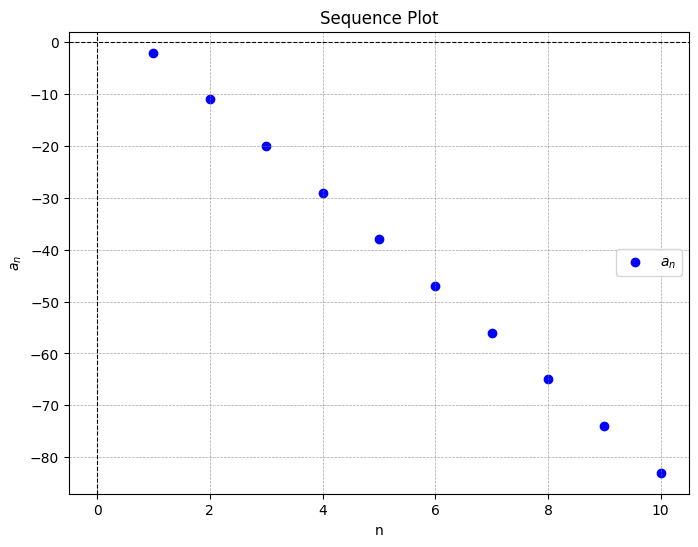

In [13]:
# Arithmetic sequence
a = 7  # a_1
NumOfTerms = 10
a_values = []     # Empty list
for n in range(NumOfTerms):
  print(f"a{n+1} = {a}-9")  # Starts at 1
  a = a - 9               # a_n = a_(n-1) - 9
  a_values.append(a)      # Append the value to the list

# Plot them
plot_seq(a_values)

# X.6. Generate the n-th term of an arithmetic sequence

In [14]:
# Calculate the n-th term:
a_1 = 2
d = 3.0
n = 100

a_n = a_1 + (n-1)*d

print(f"{n}-th term is {a_n}")

100-th term is 299.0


# X.7. Recursive Formula for a Geometric Sequence with plot
Geometric Sequence
$$ a_n = r \cdot a_{n-1}$$

Example:
\begin{align}
  a_1 &= 5 \\
  a_n &= 3 a_{n-1} \quad\text{if}\quad n\geq 2
\end{align}



Geometric sequence
a1 = 3*5.0
a2 = 3*15.0
a3 = 3*45.0
a4 = 3*135.0
a5 = 3*405.0
a6 = 3*1215.0
a7 = 3*3645.0
a8 = 3*10935.0
a9 = 3*32805.0
a10 = 3*98415.0


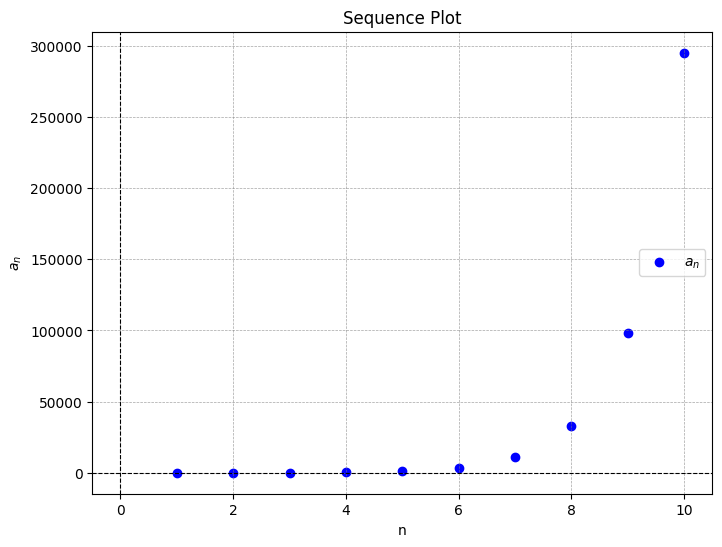

In [15]:
print("Geometric sequence")
# Geometric Sequence
a = 5. # a_1
NumOfTerms = 10
a_values   = []  # Create an empty list
for n in range(NumOfTerms):
  print(f"a{n+1} = 3*{a}")  # Starts at 1
  a = 3*a                 # a_n = r*a_(n+1)
  a_values.append(a)      # Append the value to the list

# Plot them
plot_seq(a_values)


# X.8. Generate the n-th trerm for a geometric sequence

In [16]:
# Calculate the n-th term:
a_1 = 2 # first term
r = 3.0 # r
n = 100 # 100-th term

# Calculate the term
a_n = a_1 * r**(n-1)

# Print it
print(f"{n}-th term is {a_n}")

100-th term is 3.435850138213409e+47


# X.9. Recursive Formula for an Arbitrary Sequence with plot
Arithmetic Sequence
$$ a_n = r \cdot a_{n-1} + d$$

Example:
\begin{align}
  a_1 &= 2 \\
  a_n &= 3 \cdot a_{n-1} + 2\quad\text{if}\quad n\geq 2
\end{align}


Generic equation
a1 = 3*5.0+2
a2 = 3*17.0+2
a3 = 3*53.0+2
a4 = 3*161.0+2
a5 = 3*485.0+2
a6 = 3*1457.0+2
a7 = 3*4373.0+2
a8 = 3*13121.0+2
a9 = 3*39365.0+2
a10 = 3*118097.0+2


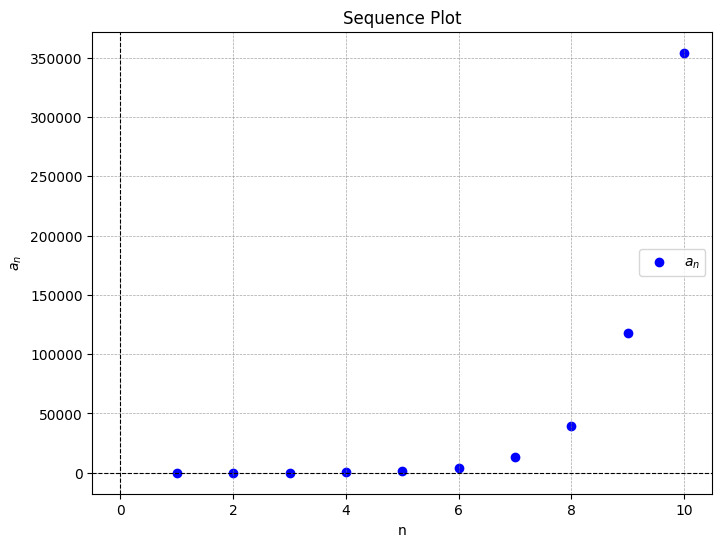

In [17]:
print("Generic equation")
# Arithmetic Sequence
a = 5. # a_1
NumOfTerms = 10
a_values   = []  # Create an empty list
for n in range(NumOfTerms):
  print(f"a{n+1} = 3*{a}+2")  # Starts at 1
  a = 3*a+2               # a_n = 3*a_(n+1)+2
  a_values.append(a)      # Append the value to the list

# Plot them
plot_seq(a_values)